In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from bliss.datasets.pair_sim import generate_pair_dataset

from bliss.datasets.lsst import prepare_final_galaxy_catalog, get_default_lsst_psf
from bliss.reporting import get_residual_measurements, get_deblended_reconstructions

import matplotlib.pyplot as plt
from bliss.catalog import FullCatalog, TileCatalog, turn_samples_into_catalogs
import pytorch_lightning as pl

import torch
import numpy as np 

from tqdm import tqdm

## Deblending + Aperture explanation

In [ ]:
import torch
import matplotlib.pyplot as plt
from bliss.datasets.lsst import APERTURE_BACKGROUND
from bliss.datasets.io import load_dataset_npz

In [ ]:
ds_images = load_dataset_npz("../../data/datasets/central_sim_dataset_5.npz")

In [ ]:
# ds = load_dataset_npz("../../data/datasets/central_sim_dataset_5.npz")
ds = torch.load("../../figures/pair_sim/central_sim_results_5.pt")

In [ ]:
ds.keys()

dict_keys(['outs', 'bld', 'true_snr', 'true_flux', 'true_plocs', 'true_n_sources', 'images'])

In [ ]:
#options 8823, 7941

In [ ]:
idx = ds['outs'][8923]['idx'].item()
idx

7330

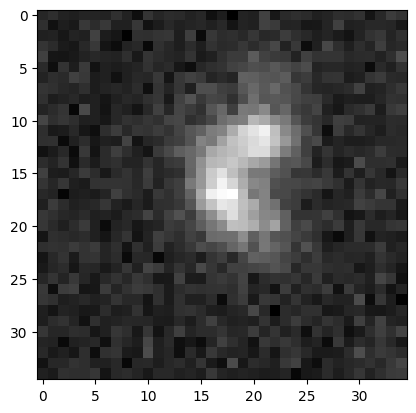

In [ ]:
plt.imshow(ds['images'][idx, 0, 24:-24, 24:-24], cmap='gray')
plt.savefig("test0.png", dpi=500)


In [ ]:
tplocs = ds['true_plocs'][idx]
map_plocs = ds['outs'][8923]['map_plocs']
n_sources = ds['true_n_sources'][idx].item()

sample_x = ds['outs'][8923]["sample_plocs"][:, 1].numpy() + 24 - 0.5
sample_y = ds['outs'][8923]["sample_plocs"][:, 0].numpy() + 24 - 0.5

In [ ]:
map_plocs.shape

torch.Size([3, 2])

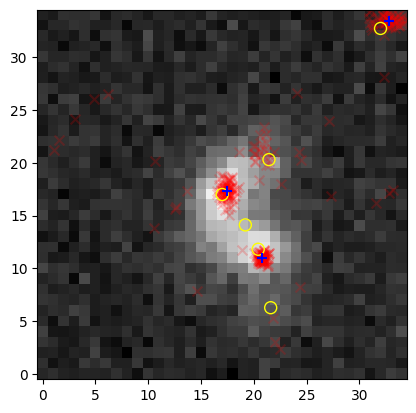

In [ ]:
size = 50
plt.scatter(
    sample_x - 24, sample_y - 24, color="red", s=size, alpha=0.2, label="Sampled Plocs", marker="x"
)

for ii in range(n_sources):
    x, y = tplocs[ii, 1] + 24 - 0.5 - 24, tplocs[ii, 0] + 24 - 0.5 - 24
    plt.scatter(x, y, color='yellow', s=size*1.5, marker='o', facecolor='none')

plt.scatter(
        map_plocs[:, 1] + 24 - 0.5 - 24,
        map_plocs[:, 0] + 24 - 0.5 - 24,
        color="blue",
        s=size*1.25,
        alpha=1.0,
        marker="+",
        label="MAP Plocs",
    )

plt.imshow(ds['images'][idx, 0, 24:-24, 24:-24], cmap='gray', origin='lower')
plt.savefig("test1.png", dpi=500)

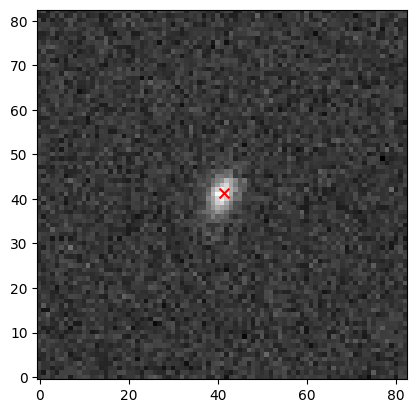

In [ ]:
im = ds['images'][idx, 0, :, :]
others = ds_images['uncentered_sources'][idx][1:, 0]
pad = ds_images['paddings'][idx, 0]
plt.imshow(im - others.sum(0) - pad, cmap='gray', origin='lower')

plt.scatter(
        map_plocs[0, 1] + 24 - 0.5,
        map_plocs[0, 0] + 24 - 0.5,
        color="red",
        s=50,
        alpha=1.0,
        marker="x",
        label="MAP Plocs",
    )